<a href="https://colab.research.google.com/github/algo74/MLCourse/blob/master/HW1/hw1_problem5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW1. Problem 5. 

Extend the network from Problem 4 by adding new features.

*   Round the grey values of the images to 1 and 0 so you obtain black and white images. Add as an additional feature the number of white regions. For instance, a typical 0 has 2 white regions and 8 has 3. Use the following neighborhoods for pixels:

  pixel x,y (indicated by .) is connected to its neighbors (indicated by o):
  
```
   o
  o.o  
   o

  ooo
  o.o
  ooo
```
*   Consider the width.
*   Consider the height.
*   Come up with other features.




## Loading the image data

In [1]:
from keras.datasets import mnist
import numpy as np

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

Using TensorFlow backend.


## Preparing the image data

In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

## Adding extra features

In [0]:
# returns new input set with added (and normalized) feature described by 'func'
def addFeature(func, X):
  
  def arr_f(arg):
    return [func(arg)]
  
  new = np.apply_along_axis(arr_f, 1, X)
  new = new / max(np.max(new), 1)
  return np.c_[new, X]

### White region - common functions

In [0]:
threshold = 0.6

def paint (i, n, img, nbs):
  # do nothing if out of bound or already painted
  if not 0 <= i < n: return
  if img[i] : return
  # do paint
  img[i] = True
  for j in nbs:
    paint(i+j, n, img, nbs)
  
def countRegions(img, nbs):
  # do BW
  img = (img > threshold)
  n = len(img)
  regions = 0
  for i in range(n):
    if not img[i] :
      # found new region
      regions += 1
      # paint it
      paint(i, n, img, nbs)
  return regions

### White region A
```
   o
  o.o  
   o
```

In [5]:
def addWhiteRegionsA(X):
  nbs = [-1, -28, 1, 28]
  def countWhiteRegionsA(img):
    return countRegions(img, nbs)
  
  return addFeature(countWhiteRegionsA, X)
  

print(addWhiteRegionsA(train_images[0:50])[:,0])
print (train_labels_original[0:50])

[0.25 0.5  0.25 0.25 0.5  0.5  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.5
 0.25 0.25 0.5  0.75 0.25 0.5  0.25 0.5  0.5  0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.5  0.75 0.25 0.5  0.5  0.25 0.5  0.5  0.25 0.5  0.25 0.75
 0.25 0.5  0.25 0.5  1.   0.25 0.5  0.5 ]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3]


### White region B
```
  ooo
  o.o
  ooo
```

In [7]:
def addWhiteRegionsB(X):
  nbs = [-29, -1, -28, -27, 1, 29, 28, 27]
  def countWhiteRegionsB(img):
    return countRegions(img, nbs)
  
  return addFeature(countWhiteRegionsB, X)
  

print(addWhiteRegionsB(train_images[0:50])[:,0])
print (train_labels_original[0:50])

[0.33333333 0.66666667 0.33333333 0.33333333 0.66666667 0.66666667
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.66666667 0.33333333 0.33333333 0.66666667 1.
 0.33333333 0.33333333 0.33333333 0.66666667 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 1.         0.33333333 0.66666667 0.66666667 0.33333333
 0.66666667 0.66666667 0.33333333 0.66666667 0.33333333 0.66666667
 0.33333333 0.66666667 0.33333333 0.66666667 0.66666667 0.33333333
 0.33333333 0.66666667]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3]


### Width and height

In [8]:
def addW_n_H(X):
  def W_n_H(img):
    img = (img > threshold)
    img = img.reshape((28,28))
    # https://stackoverflow.com/questions/52931022/finding-height-and-width-of-an-image-using-numpy-and-pixel-locations
    col_ind=np.where(np.any(img, axis=0))[0]
    row_ind=np.where(np.any(img, axis=1))[0]
    try:
      w = col_ind[-1] - col_ind[0]
      h = row_ind[-1] - row_ind[0]
    except:
      w, h = 0, 0
    return [w, h]
    
  new = np.apply_along_axis(W_n_H, 1, X)
  new = new / max(np.max(new), 1)
  return np.c_[new, X]

print(addW_n_H(train_images[0:10])[:,0:2])
print (train_labels_original[0:10])

[[0.89473684 1.        ]
 [0.78947368 1.        ]
 [0.94736842 1.        ]
 [0.57894737 1.        ]
 [0.68421053 1.        ]
 [1.         0.78947368]
 [0.26315789 1.        ]
 [0.84210526 1.        ]
 [0.10526316 1.        ]
 [0.89473684 1.        ]]
[5 0 4 1 9 2 1 3 1 4]


### Adding all 4 new features

In [0]:
test_images = addW_n_H(test_images)

In [0]:
test_images = addWhiteRegionsA(test_images)

In [0]:
test_images = addWhiteRegionsB(test_images)

In [0]:
train_images = addW_n_H(train_images)

In [0]:
train_images = addWhiteRegionsA(train_images)

In [0]:
train_images = addWhiteRegionsB(train_images)

In [15]:
print(train_images.shape)
print(test_images.shape)

(60000, 788)
(10000, 788)


## Preparing the labels

We need to categorically encode the labels.

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

## The network architecture

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7890      
Total params: 7,890
Trainable params: 7,890
Non-trainable params: 0
_________________________________________________________________


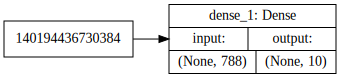

In [17]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(10, activation='softmax', input_shape=(train_images.shape[1],)))
network.summary()

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(network, show_shapes=True, rankdir='LR').create(prog='dot', format='svg'))


## The compilation step

In [0]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])



## The training step

In [19]:
epochs = 50
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 46us/step - loss: 1.2496 - acc: 0.7240 - val_loss: 0.7956 - val_acc: 0.8436
Epoch 2/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.7055 - acc: 0.8454 - val_loss: 0.5966 - val_acc: 0.8665
Epoch 3/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.5786 - acc: 0.8634 - val_loss: 0.5158 - val_acc: 0.8789
Epoch 4/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.5172 - acc: 0.8728 - val_loss: 0.4705 - val_acc: 0.8853
Epoch 5/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.4795 - acc: 0.8792 - val_loss: 0.4403 - val_acc: 0.8897
Epoch 6/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.4534 - acc: 0.8836 - val_loss: 0.4187 - val_acc: 0.8924
Epoch 7/50
60000/60000 [==============================] - 2s 33us/step - loss: 0

## Display the training/test loss/accuracy

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

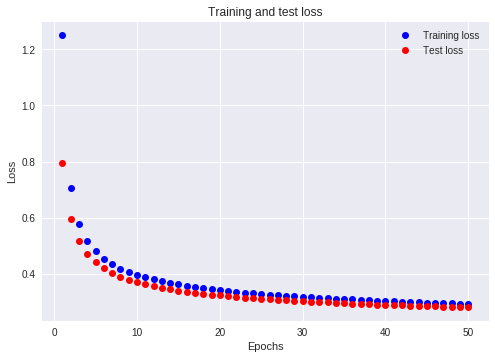

In [21]:
import matplotlib.pyplot as plt

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

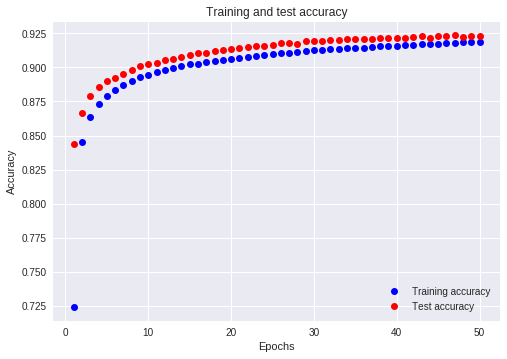

In [23]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()